# Normal Distribution

In [1]:
# Importing the essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
from scipy.stats import norm

* A normal distribution is the proper term for a probability bell curve.
* In a normal distribution the mean is zero and the standard deviation is 1.
* It has zero skew and a kurtosis of 3.
* Normal distributions are symmetrical , but not all symmetrical distributions are normal.

In [10]:
data=norm.rvs(size=1000, loc=2, scale=3)
data[:10]

array([ 6.36529124,  6.57837006,  7.85780416, -3.30033448,  1.32422146,
        0.96595595,  5.89286383,  4.14575392,  3.36006633,  4.7619259 ])

In [11]:
data.mean()

1.8668609300032817

In [12]:
data.std()

2.9450729999231617

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


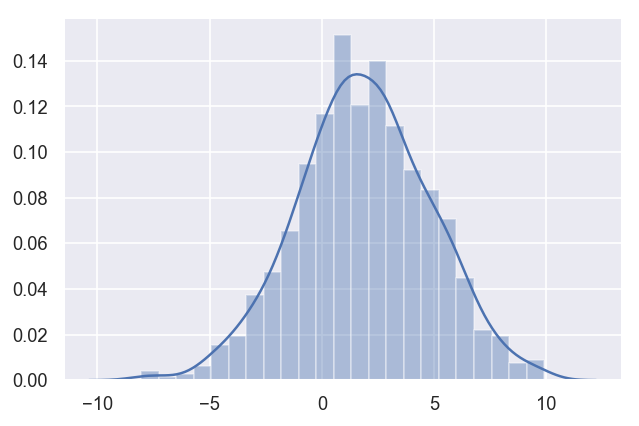

In [13]:
plt.figure(dpi=120)
sns.distplot(data)
plt.show()

### Skewnesss and Kurtosis

For a standard normal distribution 
* Skewness is 0
* Kurtosis is 3 

[Note: in Scipy package it is corrected to 0 as per Fisher’s definition]

In [14]:
from scipy.stats import skew,kurtosis
print("Skewness",skew(data))
print("kurtosis",kurtosis(data))

Skewness -0.059994106144444226
kurtosis 0.012500309715253177


In [15]:
norm.pdf(x=5,loc=2,scale=3)

0.08065690817304778

In [16]:
for i in np.arange(-15,15):
    print(i,"->",norm.pdf(x=i,loc=2,scale=3))

-15 -> 1.4156295821516289e-08
-14 -> 8.854339695073042e-08
-13 -> 4.955731715780993e-07
-12 -> 2.4820152902099967e-06
-11 -> 1.1123620798546141e-05
-10 -> 4.461007525496179e-05
-9 -> 0.00016009021720694023
-8 -> 0.0005140929987637018
-7 -> 0.001477282803979336
-6 -> 0.003798662007932481
-5 -> 0.00874062969790316
-4 -> 0.017996988837729353
-3 -> 0.03315904626424956
-2 -> 0.05467002489199788
-1 -> 0.08065690817304778
0 -> 0.10648266850745075
1 -> 0.12579440923099774
2 -> 0.1329807601338109
3 -> 0.12579440923099774
4 -> 0.10648266850745075
5 -> 0.08065690817304778
6 -> 0.05467002489199788
7 -> 0.03315904626424956
8 -> 0.017996988837729353
9 -> 0.00874062969790316
10 -> 0.003798662007932481
11 -> 0.001477282803979336
12 -> 0.0005140929987637018
13 -> 0.00016009021720694023
14 -> 4.461007525496179e-05


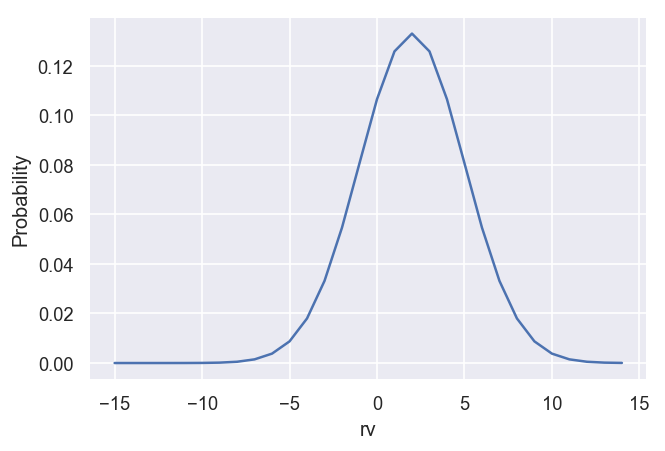

In [17]:
rv,prob=[],[]
for i in np.arange(-15,15):
    rv.append(i)
    prob.append(norm.pdf(x=i,loc=2,scale=3))
df=pd.DataFrame({"rv":rv,"Probability":prob})
plt.figure(dpi=120)
sns.lineplot(x="rv",y="Probability",data=df)
plt.show()

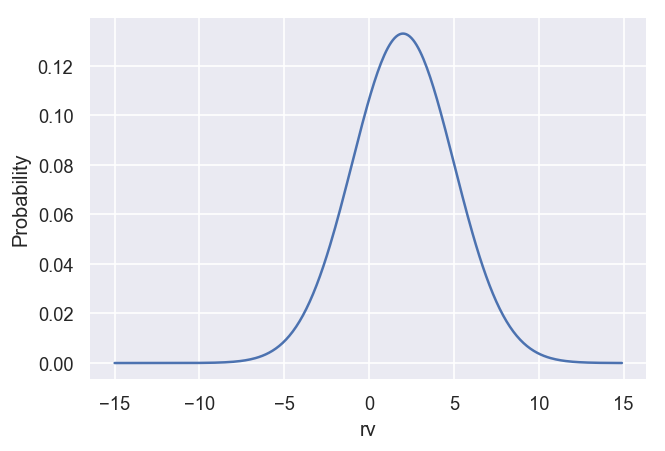

In [18]:
# Increace the x value in between
rv,prob=[],[]
for i in np.arange(-15,15,0.1):
    rv.append(i)
    prob.append(norm.pdf(x=i,loc=2,scale=3))
df=pd.DataFrame({"rv":rv,"Probability":prob})
plt.figure(dpi=120)
sns.lineplot(x="rv",y="Probability",data=df)
plt.show()

In [19]:
rv,pdf_data,cdf_data=[],[],[]
for i in np.arange(-15,15,0.1):
    rv.append(i)
    pdf_data.append(norm.pdf(x=i,loc=2,scale=3))
    cdf_data.append(norm.cdf(x=i,loc=2,scale=3))
df=pd.DataFrame({"rv":rv,"PDF":pdf_data,"CDF":cdf_data})
df.head()

,rv,PDF,CDF
0,-15.0,1.415630e-08,7.280110e-09
1,-14.9,1.708999e-08,8.837967e-09
2,-14.8,2.060874e-08,1.071759e-08
3,-14.7,2.482438e-08,1.298292e-08
4,-14.6,2.986915e-08,1.571008e-08


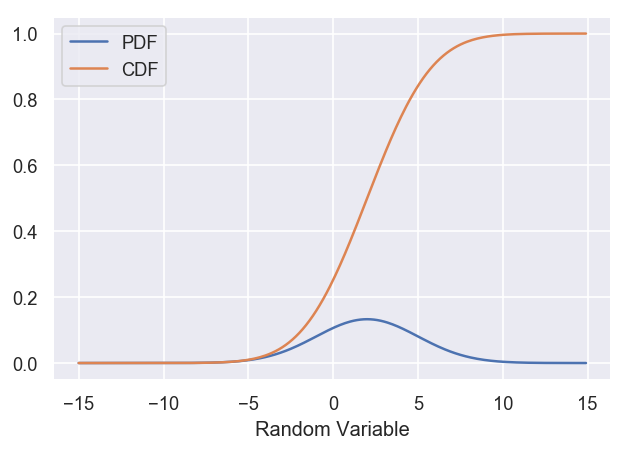

In [20]:
plt.figure(dpi=120)
plt.plot(df["rv"],df["PDF"],label="PDF")
plt.plot(df["rv"],df["CDF"],label="CDF")
plt.xlabel("Random Variable")
plt.legend()
plt.show()

In [21]:
norm.cdf(x=5,loc=2,scale=3)

0.8413447460685429

In [22]:
norm.ppf(q=0.84,loc=2,scale=3)

4.983373649629259

In [23]:
x=[1,2,3]
y=["a","b","c"]
for i,j in zip(x,y):
    print(i,j)

1 a
2 b
3 c


In [24]:
def norm_gen(mu,sd):
    rv,pdf_data,cdf_data=[],[],[]
    for i in np.arange(-15,15,0.1):
        rv.append(i)
        pdf_data.append(norm.pdf(x=i,loc=mu,scale=sd))
        cdf_data.append(norm.cdf(x=i,loc=mu,scale=sd))
    df=pd.DataFrame({"rv":rv,"PDF":pdf_data,"CDF":cdf_data})
    return df

In [25]:
norm_gen(0,1).head()

,rv,PDF,CDF
0,-15.0,5.530710e-50,3.670966e-51
1,-14.9,2.466330e-49,1.647897e-50
2,-14.8,1.088876e-48,7.324131e-50
3,-14.7,4.759516e-48,3.222986e-49
4,-14.6,2.059701e-47,1.404227e-48


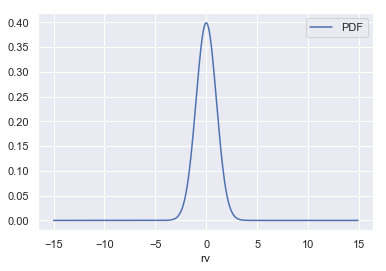

In [26]:
norm_gen(0,1).plot("rv","PDF")

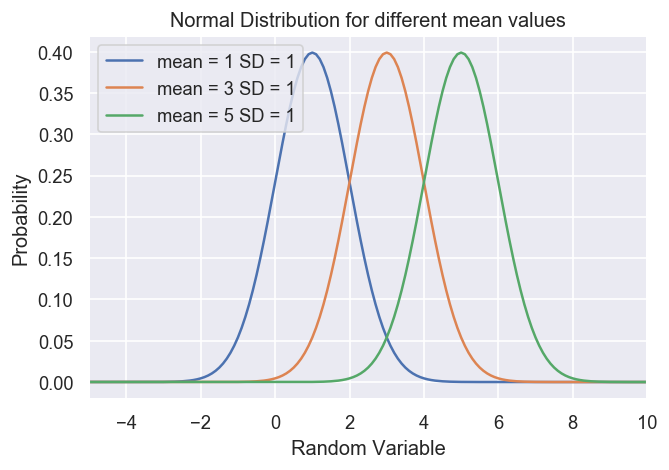

In [27]:
plt.figure(dpi=120)
x=[1,3,5]
y=[1,1,1]
for i,j in zip(x,y):
    plt.plot(norm_gen(i,j).rv,norm_gen(i,j).PDF,label="mean = "+str(i)+" SD = "+str(j))
plt.xlabel("Random Variable")
plt.ylabel("Probability")
plt.title("Normal Distribution for different mean values")
plt.xlim([-5,10])
plt.legend()
plt.show()

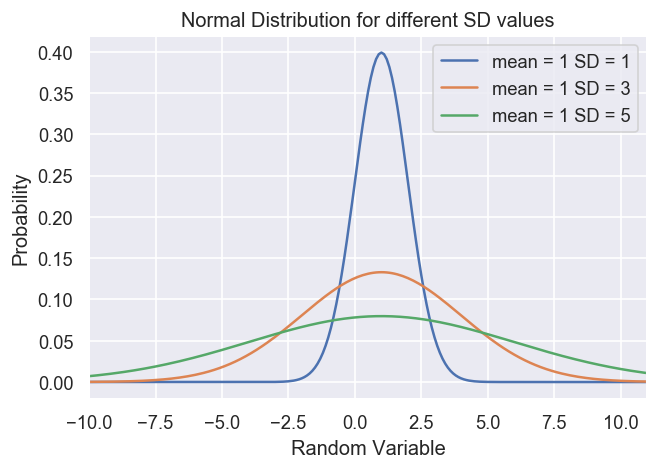

In [28]:
plt.figure(dpi=120)
y=[1,3,5]
x=[1,1,1]
for i,j in zip(x,y):
    plt.plot(norm_gen(i,j).rv,norm_gen(i,j).PDF,label="mean = "+str(i)+" SD = "+str(j))
plt.xlabel("Random Variable")
plt.ylabel("Probability")
plt.title("Normal Distribution for different SD values")
plt.xlim([-10,11])
plt.legend()
plt.show()

In [29]:
# Iterator througth two list with all combinations
x=[1,2,3]
y=["a","b"]
[(f,s) for f in x for s in y]

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')]

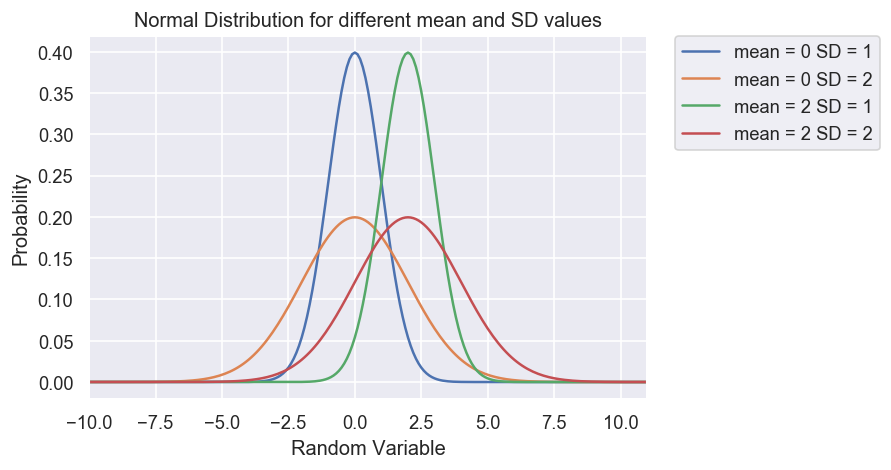

In [57]:
plt.figure(dpi=120)
x=[0,2]
y=[1,2]
for i,j in [(f,s) for f in x for s in y]:
    plt.plot(norm_gen(i,j).rv,norm_gen(i,j).PDF,label="mean = "+str(i)+" SD = "+str(j))
plt.xlabel("Random Variable")
plt.ylabel("Probability")
plt.title("Normal Distribution for different mean and SD values")
plt.xlim([-10,11])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

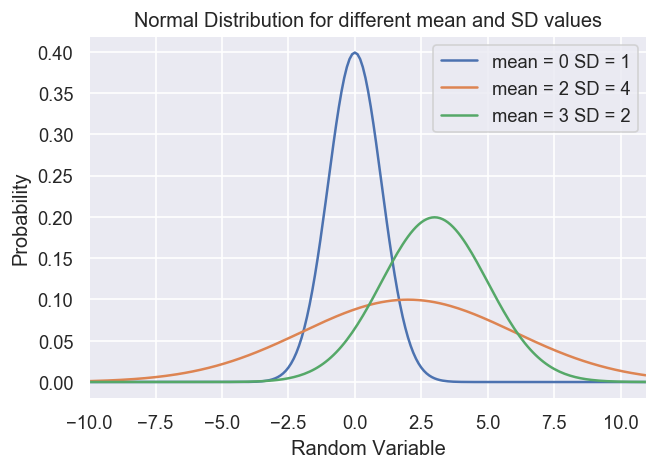

In [31]:
plt.figure(dpi=120)
x=[0,2,3]
y=[1,4,2]
for i,j in zip(x,y):
    plt.plot(norm_gen(i,j).rv,norm_gen(i,j).PDF,label="mean = "+str(i)+" SD = "+str(j))
plt.xlabel("Random Variable")
plt.ylabel("Probability")
plt.title("Normal Distribution for different mean and SD values")
plt.xlim([-10,11])
plt.legend()
plt.show()

At a facility that manufactures electrical resistors, a statistical sample of 1-kΩ resistors is pulled from the production line. The resistor's resistances are measured and recorded. A mean resistance of 979.8 kΩ and a standard deviation of 73.10 kΩ represents the sample of resistors. The desired resistance tolerance for the 1-kΩ resistors is ± 10%. This tolerance range means the acceptable range of resistance is 900 Ω to 1100 Ω.

What is the Probability of getting the resistor in the acceptable range

If 1000 resistor are manufactured how many may be accepted

In [5]:
mu = 998.8 
sigma = 73.10
x1 = 900
x2 = 1100

In [6]:
norm.cdf(x2,loc=mu,scale=sigma)-norm.cdf(x1,loc=mu,scale=sigma)

0.8286268028320297

In [11]:
print("Resistors that may be accepted out of 1000 :",
      int((norm.cdf(x2,loc=mu,scale=sigma)-norm.cdf(x1,loc=mu,scale=sigma))*1000))

Resistors that may be accepted out of 1000 : 828


## Graphical Visualization

In [34]:
x = np.arange(x1, x2, 0.001)
x_all = np.arange(800, 1200, 0.001)

y = norm.pdf(x,loc=mu,scale=sigma)
y2 = norm.pdf(x_all,loc=mu,scale=sigma)

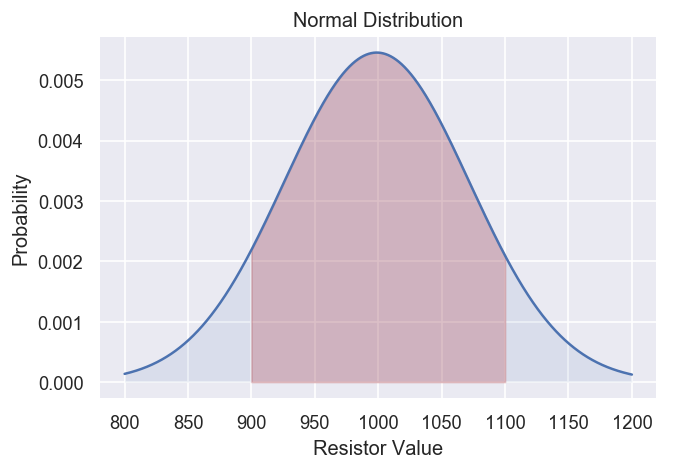

In [35]:
plt.figure(dpi=120)
plt.plot(x_all,y2)
plt.fill_between(x,y,0, alpha=0.3, color='r')
plt.fill_between(x_all,y2,0, alpha=0.1)
plt.xlabel('Resistor Value')
plt.ylabel("Probability")
plt.title('Normal Distribution')
plt.show()

## Converting to Z Scores -> Standard Normal Distribution : Mean=0 sd=1

In [36]:
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [37]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

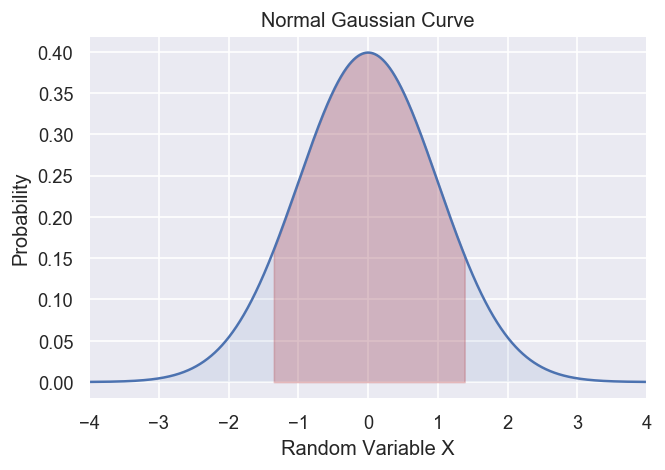

In [38]:
plt.figure(dpi=120)
plt.plot(x_all,y2)
plt.fill_between(x,y,0, alpha=0.3, color='r')
plt.fill_between(x_all,y2,0, alpha=0.1)
plt.xlim([-4,4])
plt.xlabel('Random Variable X')
plt.ylabel("Probability")
plt.title('Normal Gaussian Curve')
plt.show()

In [39]:
norm.cdf(z2)-norm.cdf(z1)

0.8286268028320297

### 3 Sigma Rule

In [40]:
mean=0
sd=1

In [41]:
# 1 sigma
norm.cdf(mean+sd,mean,sd)-norm.cdf(mean-sd,mean,sd)

0.6826894921370859

In [42]:
# 2 sigma
norm.cdf(mean+2*sd,mean,sd)-norm.cdf(mean-2*sd,mean,sd)

0.9544997361036416

In [43]:
# 3 sigma
norm.cdf(mean+3*sd,mean,sd)-norm.cdf(mean-3*sd,mean,sd)

0.9973002039367398

# Central Limit Theorem

The central limit theorem states that under certain (fairly common) conditions, the sum of many random variables will have an approximately normal distribution.

In [44]:
data=np.random.randint(100,size=10_00_000)
data[:10]

array([43, 35, 38, 84, 24, 54,  8, 66, 43, 23])

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


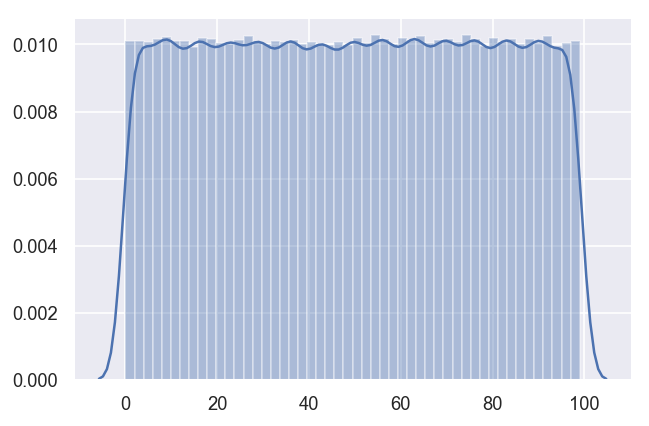

In [45]:
plt.figure(dpi=120)
sns.distplot(data)
plt.show()

In [46]:
np.random.choice(data,size=10)

array([ 3, 28, 67, 78, 24, 46, 63, 92, 91, 69])

In [47]:
np.random.choice(data,size=10).mean()

67.9

In [48]:
sample_size=5
no_sample=10
data_mean=[]
for _ in tqdm(np.arange(no_sample)):
    data_mean.append(np.random.choice(data,size=sample_size).mean())

100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


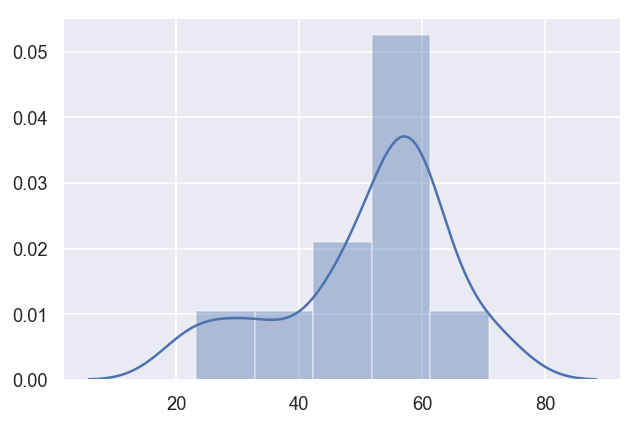

In [49]:
plt.figure(dpi=120)
sns.distplot(data_mean)
plt.show()

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 29995.74it/s]
D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


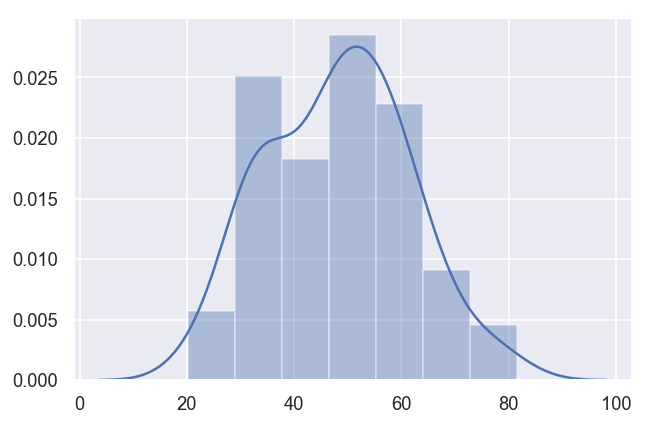

In [50]:
sample_size=5
no_sample=100
data_mean=[]
for _ in tqdm(np.arange(no_sample)):
    data_mean.append(np.random.choice(data,size=sample_size).mean())
plt.figure(dpi=120)
sns.distplot(data_mean)
plt.show()

Enter the Sample Size :10
Enter the number of samples :1000


100%|██████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16972.88it/s]
D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


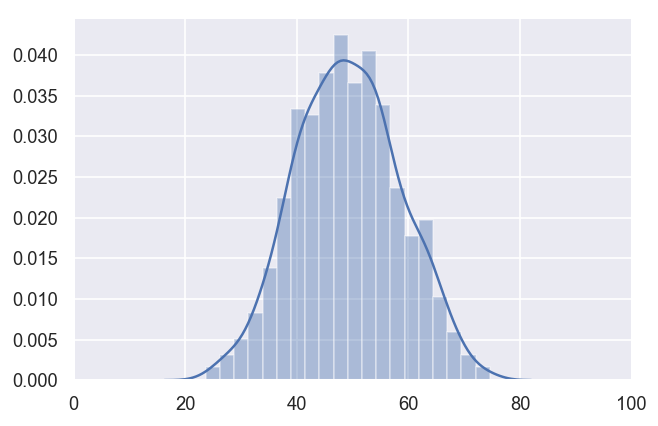

In [51]:
#sample_size=5
#no_sample=10
sample_size=int(input("Enter the Sample Size :"))
no_sample=int(input("Enter the number of samples :"))
data_mean=[]
for _ in tqdm(np.arange(no_sample)):
    data_mean.append(np.random.choice(data,size=sample_size).mean())
plt.figure(dpi=120)
sns.distplot(data_mean)
plt.xlim([0,100])
plt.show()

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


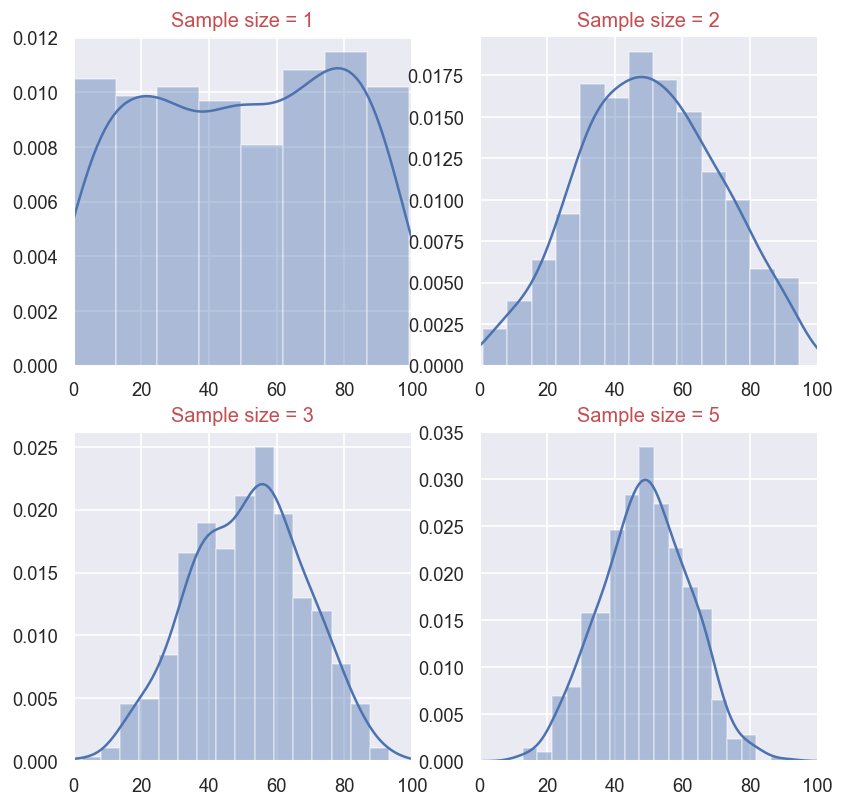

In [52]:
plt.figure(dpi=120,figsize=(8,8))
sample_size=[1,2,3,5]
index=[1,2,3,4]
no_sample=500
for i,ss in zip(index,sample_size):
    plt.subplot(2,2,i)
    data_mean=[]
    for _ in np.arange(no_sample):
        data_mean.append(np.random.choice(data,size=ss).mean())
    sns.distplot(data_mean)
    title_obj=plt.title("Sample size = "+str(ss))
    plt.setp(title_obj, color='r') 
    plt.xlim([0,100])
plt.show()

100%|██████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 16134.52it/s]
D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


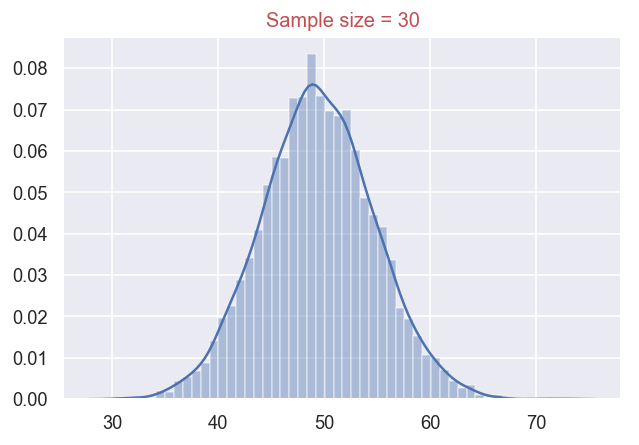

In [53]:
sample_size=30
no_sample=5_000
data_mean=[]
for _ in tqdm(np.arange(no_sample)):
    data_mean.append(np.random.choice(data,size=sample_size).mean())
plt.figure(dpi=120)
sns.distplot(data_mean)
title_obj=plt.title("Sample size = 30")
plt.setp(title_obj, color='r') 
plt.show()

In [54]:
print("Skewness",skew(data_mean))
print("kurtosis",kurtosis(data_mean))

Skewness 0.04475811772203599
kurtosis 0.06408090385800147
